In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper Libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dreas','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

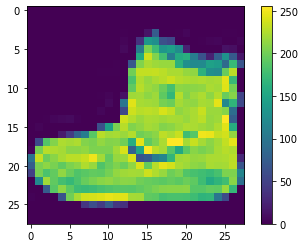

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() # 显示侧边的颜色条（颜色->数值）
plt.grid(False)
plt.show()

In [9]:
train_images = train_images/255.0
test_images = test_images/255.0

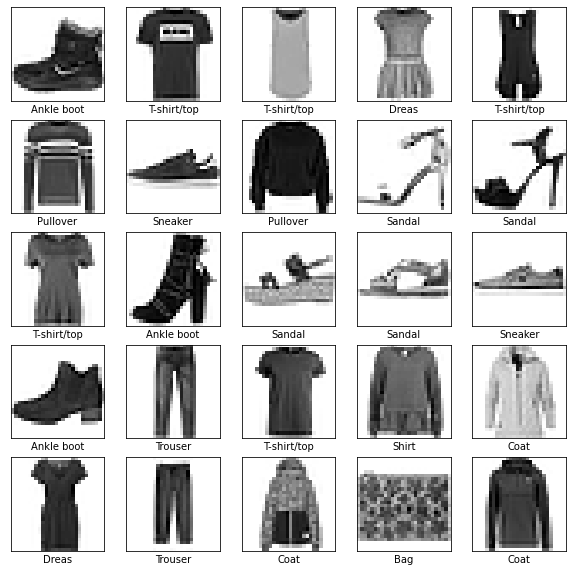

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # 总共5行5列，这里画第i个，顺序为从左上角到右下角
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

2022-03-06 19:37:16.566459: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-06 19:37:16.568335: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4943 - accuracy: 0.8275
Epoch 2/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3721 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3339 - accuracy: 0.8789
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3108 - accuracy: 0.8860
Epoch 5/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2925 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2799 - accuracy: 0.8971
Epoch 7/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2658 - accuracy: 0.9011
Epoch 8/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2560 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2450 - accuracy: 0.9082
Epoch

In [16]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
test_loss,test_acc

10000/1 - 1s - loss: 0.2285 - accuracy: 0.8863


(0.34100912430286406, 0.8863)

In [17]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [25]:
def plot_image(i,predictions_array,true_label,img):
    '''
    画出第i个图形的预测情况(图像+预测正确率)
    Parameters
    ----------
    i：第i个预测
    predictions_array：预测数组
    true_label：真实的标签数组
    img：图片数组

    Returns
    -------

    '''
    predictions_array,true_label,img = predictions_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap = plt.cm.binary)

    predict_label = np.argmax(predictions_array)
    if predict_label==true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f} ({})".format(class_names[predict_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label],
                                        color=color))
def plot_value_array(i,predictions_array,true_label):
    '''
    画出第i个图形，分类概率
    Parameters
    ----------
    i：第i个预测
    predictions_array：预测数组
    true_label：真实的标签

    Returns
    -------

    '''
    predictions_array,true_label = predictions_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predict_label = np.argmax(predictions_array)

    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')

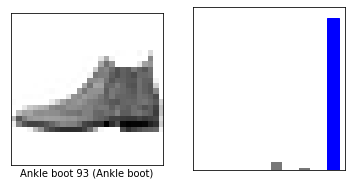

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

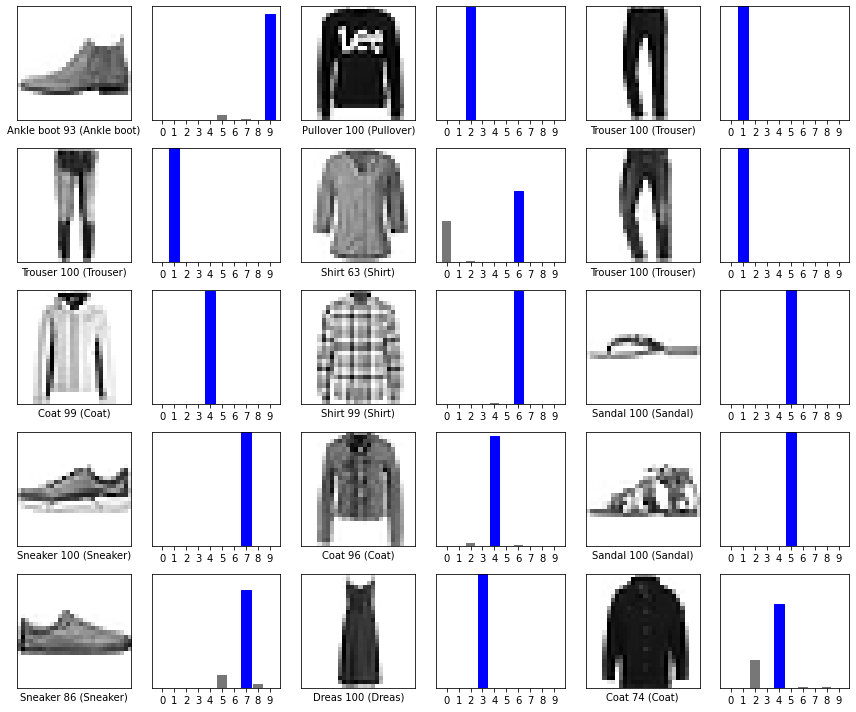

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()